In [11]:
import pandas as pd
import xarray as xr
from scipy.interpolate import griddata

In [12]:
ks = xr.open_dataset("./kc_raster_final/kc_2015-2019.nc")
df = pd.read_csv('./ET_data/ET_o Estimate PJS.csv', index_col=[0], parse_dates=True)

In [13]:
xv, yv = np.meshgrid(ks['lon'].values, ks['lat'].values)

In [14]:
month = '2015-01' # Needs to be run for each month!
data = df[month]
data = data[data['ETo'].notna()]
points = (data['lon'].values, data['lat'].values)
ETo = data['ETo'].values

In [15]:
result=griddata(points, ETo, (xv,yv), method='nearest')

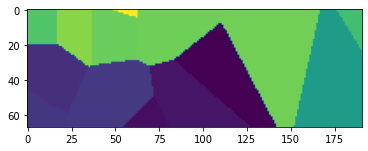

In [16]:
plt.imshow(result.reshape(len(ks['lat'].values), len(ks['lon'].values)))